<a href="https://colab.research.google.com/github/EmilyKan/pycs4001/blob/main/class8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class08/drug200.csv")
# print(data.head(5))

x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

dummy_x = pd.get_dummies(x)
# print(dummy_x)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dummy_x, y, test_size=0.2, random_state=10)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

sc_train_x = scaler_x.fit_transform(train_x)


print(f"train_x shape:  {train_x.shape}")
print(f"test_x shape: {test_x.shape}")

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=10)
tree.fit(train_x, train_y)
y_pred = tree.predict(test_x)



from sklearn.metrics import mean_squared_error
sc_test_x = scaler_x.transform(test_x)
from sklearn import metrics
print("DecisionTree Accuracy: ", metrics.accuracy_score(test_y, y_pred))



train_x shape:  (160, 9)
test_x shape: (40, 9)
DecisionTree Accuracy:  1.0


In [7]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



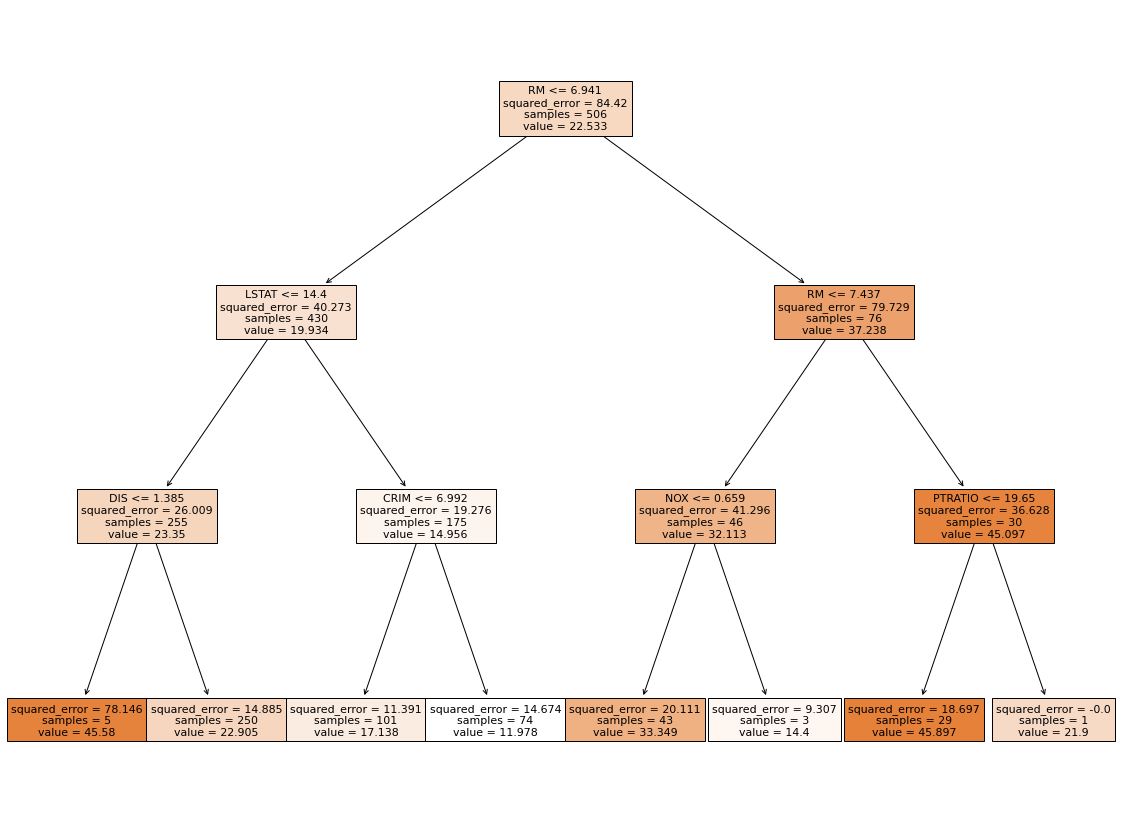

In [12]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

boston = datasets.load_boston()
X = boston.data
y = boston.target
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

text_representation = tree.export_text(regr)
print(text_representation)
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)
